<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-libraries" data-toc-modified-id="Import-the-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import the libraries</a></span></li><li><span><a href="#Create-lists-to-store-the-scraped-data-in" data-toc-modified-id="Create-lists-to-store-the-scraped-data-in-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create lists to store the scraped data in</a></span></li><li><span><a href="#Preparing-the-monitoring-of-the-loop" data-toc-modified-id="Preparing-the-monitoring-of-the-loop-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparing the monitoring of the loop</a></span></li><li><span><a href="#Loop-through-years-2010---2020" data-toc-modified-id="Loop-through-years-2010---2020-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loop through years 2010 - 2020</a></span></li><li><span><a href="#Create-the-Movies-Pandas-Dataframe" data-toc-modified-id="Create-the-Movies-Pandas-Dataframe-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create the Movies Pandas Dataframe</a></span></li><li><span><a href="#Clean-up-the-year-column" data-toc-modified-id="Clean-up-the-year-column-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clean up the year column</a></span></li><li><span><a href="#Need-to-make-the-IMDB-and-metascore-ratings-the-same-scale" data-toc-modified-id="Need-to-make-the-IMDB-and-metascore-ratings-the-same-scale-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Need to make the IMDB and metascore ratings the same scale</a></span></li><li><span><a href="#Write-the-results-to-a-CSV" data-toc-modified-id="Write-the-results-to-a-CSV-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Write the results to a CSV</a></span></li><li><span><a href="#Create-two-histograms" data-toc-modified-id="Create-two-histograms-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Create two histograms</a></span><ul class="toc-item"><li><span><a href="#Create-a-histogram-of-the-average-IMDB-rating" data-toc-modified-id="Create-a-histogram-of-the-average-IMDB-rating-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Create a histogram of the average IMDB rating</a></span></li><li><span><a href="#Create-another-histogram-of-the-average-metascore-rating" data-toc-modified-id="Create-another-histogram-of-the-average-metascore-rating-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Create another histogram of the average metascore rating</a></span></li></ul></li></ul></div>

In this assignment you will learn to scrape multiple web pages with Python using BeautifulSoup and requests. We’ll then perform some simple analysis using pandas, and matplotlib.  We will be scraping IMDB for the movies across a decade (2010-2020) and compare the metascore and the IMDB rating.

To Do’s for the assignment (50 Marks)

Gather the data

●	Loop through the years_url list to vary the release_date parameter of the URL (5 Marks)

●	For each element in years_url, loop through the pages list to vary the page parameter of the URL (5 Marks)

●	Pause the loop for a time interval between 8 and 15 seconds (2 Marks)

●	Throw a warning for non-200 status codes (3 Marks)

●	Break the loop if the number of requests is greater than the 70 expected. (2 Marks)

Parse the data with Beautiful Soup

●	Convert the response‘s HTML content to a BeautifulSoup object (2 Marks)

●	Extract all movie containers from this BeautifulSoup object (3 Marks)

●	Loop through all these containers (3 Marks)

●	Extract the data if a container has a Metascore (2 Marks)

Manipulate the data with Pandas

●	Create a Pandas Dataframe to hold the info scraped (movie, years imdb_ratings, metascore, votes) (5 Marks)

●	Write the Pandas Dataframe to a CSV (3 Marks)

Visualize the data with matplotlib

●	Use matplotlib to create two histograms to visually compare the average IMDB rating to the average metascore rating (15 Marks)

# Import the libraries

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint
import requests
from requests import get
from requests.exceptions import RequestException
from time import sleep, time
from warnings import warn
import re

# Create lists to store the scraped data in

In [2]:
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop

In [3]:
start_time = time()
requests = 0

# Loop through years 2010 - 2020

Scrape data from IMDB

Loop through pages 1 - 5

Sleep for 8 to 15 seconds

Modify the requesr URL for year and page

Throw a warning for non-200 status codes

Break the loop if the number of requests is greater than 70

Find movie containers

Extract data from individual movie container

If the movie has Metascore, then extract

In [4]:
# Loop through years 2010 - 2020
for ye in range(2010, 2021):

    # Loop through pages 1 - 5
    for page in range(1, 202, 50):

        # Sleep for 8 to 15 seconds
        sleep(randint(8,15))
        # Modify the requesr URL for year and page
        url = 'https://www.imdb.com/search/title/?release_date=' + \
            str(ye)+'-01-01,'+str(ye) + \
            '-12-31&sort=num_votes,desc&start='+str(page) +'&ref_=adv_nxt'
        
        response = get(url)
        requests +=1
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        # Break the loop if the number of requests is greater than 70
        if requests > 70:
            break

        html_soup = BeautifulSoup(response.text, 'html.parser')

        # Find movie containers
        movie_containers = html_soup.find_all('div', class_='lister-item mode-advanced')

        # Extract data from individual movie container
        for container in movie_containers:
            # If the movie has Metascore, then extract:
            if container.find('span', class_='metascore') is not None:

                name = container.h3.a.text
                names.append(name)

                year = container.h3.find('span', class_='lister-item-year text-muted unbold').text
                years.append(year)

                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                m_score = container.find('span', class_='metascore').text
                metascores.append(int(m_score))

                vote = container.find('span', attrs={'name': 'nv'})['data-value']
                votes.append(int(vote))

# Create the Movies Pandas Dataframe

In [5]:
# Create the Movies Pandas Dataframe
movies_df=pd.DataFrame()
movies_df['Name of the Movie'] = names
movies_df['Year'] = years
movies_df['Rate'] = imdb_ratings
movies_df['Metascore'] = metascores
movies_df['Votes'] = votes
movies_df

,Name of the Movie,Year,Rate,Metascore,Votes
0,Inception,(2010),8.8,74,2334129
1,Shutter Island,(2010),8.2,63,1303396
2,Toy Story 3,(2010),8.3,92,833234
3,Iron Man 2,(2010),6.9,57,814835
4,Black Swan,(2010),8.0,79,765214
...,...,...,...,...,...
1913,Kajillionaire,(2020),6.4,78,19064
1914,The Rhythm Section,(2020),5.4,45,18737
1915,Ammonite,(2020),6.5,72,18684
1916,Jingle Jangle: A Christmas Journey,(2020),6.4,69,18601


# Clean up the year column

In [6]:
# Clean up the year column - have it just be the year nothing else
movies_df.loc[:, 'Year'] = movies_df['Year'].str[-5:-1].astype(int)

# Need to make the IMDB and metascore ratings the same scale 

In [7]:
# Need to make the IMDB and metascore ratings the same scale - so multiply the IMDB column by 10
movies_df['n_Rate'] = movies_df['Rate'] * 10

# Write the results to a CSV

In [8]:
movies_df.to_csv('IMDB_Rating.csv',index=False)
movies_df

,Name of the Movie,Year,Rate,Metascore,Votes,n_Rate
0,Inception,2010,8.8,74,2334129,88.0
1,Shutter Island,2010,8.2,63,1303396,82.0
2,Toy Story 3,2010,8.3,92,833234,83.0
3,Iron Man 2,2010,6.9,57,814835,69.0
4,Black Swan,2010,8.0,79,765214,80.0
...,...,...,...,...,...,...
1913,Kajillionaire,2020,6.4,78,19064,64.0
1914,The Rhythm Section,2020,5.4,45,18737,54.0
1915,Ammonite,2020,6.5,72,18684,65.0
1916,Jingle Jangle: A Christmas Journey,2020,6.4,69,18601,64.0


# Create two histograms

## Create a histogram of the average IMDB rating

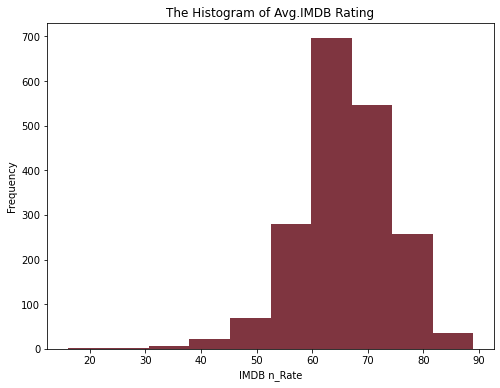

In [9]:
#Create two histograms to visually compare the average IMDB rating to the average metascore rating
movies_df.groupby('Name of the Movie')['n_Rate'].mean().plot(kind='hist', figsize=(8,6),color='#7F3540')
plt.title("The Histogram of Avg.IMDB Rating")
plt.xlabel("IMDB n_Rate")
plt.ylabel("Frequency")
plt.savefig("The Histogram of Avg.IMDB Rating.jpg")
plt.show()

## Create another histogram of the average metascore rating

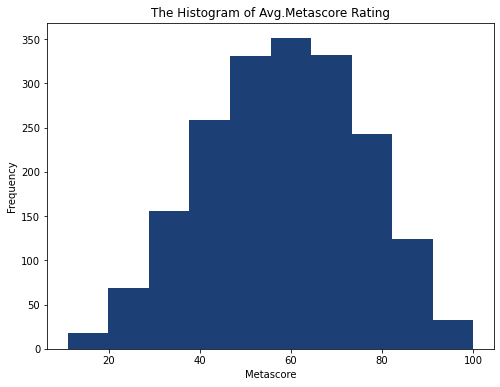

In [10]:
movies_df.groupby('Name of the Movie')['Metascore'].mean().plot(kind='hist', figsize=(8,6),color='#1C4076')
plt.title("The Histogram of Avg.Metascore Rating")
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.savefig("The Histogram of Avg.Metascore Rating.jpg")
plt.show()